# Примеры к лекции 1. Классификация сигналов: аналоговые, дискретные и цифровые сигналы.
Лекции по курсу "Дискретные преобразования сигналов", 3 курс ФРКТ МФТИ 

In [1]:
import numpy as np                # импорт бибилиотеки numpy
import matplotlib.pyplot as plt   # импорт модуля matplotlib.pyplot
import scipy.io.wavfile # импорт модуля scipy.io.wavfile
from scipy import signal
from IPython.display import Audio

In [2]:
# Если используете Jupyter, то можно поменять backend matplotlib на notebook
%matplotlib notebook
# Для использования backend matplotlib inline, раскомментируйте строку ниже.
# %matplotlib inline

## Дискретизация и квантование в WAV-файлах


* Аналоговый сигнал - звуковая волна, фиксируемая микрофотном. 
* Цифровой сигнал - набор отсчетов, взятых с шагом $\Delta t = 1/f_д$ и квантованных по $2^n$ уровням,  в памяти компьютера.

In [3]:
file_name='tuning-fork.wav'
Audio(file_name)

In [4]:
fs, x = scipy.io.wavfile.read(file_name) # чтение аудиофайла 
k_min, k_max = 8000, 10000
x1=x[k_min:k_max]                     # выбор наблюдаемого диапазона
k=np.arange(x1.size)               # отсчеты по времени

In [5]:
fs     # частота дискретизации в Гц

44100

In [6]:
1/fs # шаг дискретизации в секундах

2.2675736961451248e-05

In [7]:
x      # массив значений x[k]

array([ 0,  0, -1, ..., -3,  2, -1], dtype=int16)

$n=16$ - число бит на храненние каждого отсчета, глубина звука

In [8]:
2**16 # Число уровней квантования

65536

In [9]:
# Построение графиков 
plt.figure(figsize=[8, 4])         # создание полотна размером шириной 8 X 4 дюйма
plt.title("Фрагмент сигнала")
plt.stem((k+k_min)/fs, x1, 'b.-')           # построение графика цифрового сигнала точками точками
plt.grid()                             
plt.xlabel("$t$, c")                      
plt.ylabel("$x[k]$ (уровень квантования)")             
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

## Квантование изображения

In [10]:
import pywt # PyWavelets - Wavelet Transforms in Python
original = pywt.data.camera()

In [11]:
original

array([[200, 200, 200, ..., 189, 190, 190],
       [200, 199, 199, ..., 190, 190, 190],
       [199, 199, 199, ..., 190, 190, 190],
       ...,
       [ 25,  25,  27, ..., 139, 122, 147],
       [ 25,  25,  26, ..., 158, 141, 168],
       [ 25,  25,  27, ..., 151, 152, 149]], dtype=uint8)

In [12]:
np.max(original), np.min(original)

(np.uint8(255), np.uint8(0))

8-битное изображение (256 уровней)

In [13]:
plt.figure()
plt.imshow(original, interpolation="nearest", cmap=plt.cm.gray)
plt.show()

<IPython.core.display.Javascript object>

In [14]:
plt.figure()
plt.plot(original[400])
plt.xlabel("Номер пикселя")                      
plt.ylabel("Уровень")   
plt.grid()

<IPython.core.display.Javascript object>

In [15]:
L=64
edited=np.floor(original/L)
plt.figure()
plt.imshow(edited, interpolation="nearest", cmap=plt.cm.gray)
plt.show()
print("Число уровней квантования ", int(256/L))

<IPython.core.display.Javascript object>

Число уровней квантования  4


In [16]:
plt.figure()
plt.plot(edited[400])
plt.xlabel("Номер пикселя")                      
plt.ylabel("Уровень")   
plt.grid()

<IPython.core.display.Javascript object>

In [17]:
L=128
edited=np.floor(original/L)
plt.figure()
plt.imshow(edited, interpolation="nearest", cmap=plt.cm.gray)
plt.show()
print("Число уровней квантования ", int(256/L))

<IPython.core.display.Javascript object>

Число уровней квантования  2


In [18]:
plt.figure()
plt.plot(edited[400])
plt.xlabel("Номер пикселя")                      
plt.ylabel("Уровень")   
plt.grid()

<IPython.core.display.Javascript object>

## Анализ электрических сигналов цифровым осциллографом

* Аналоговый сигнал - разность потенциалов между точками электрической схемы. 
* Цифровой сигнал - набор отсчетов, взятых с шагом $\Delta t = 1/f_д$ и квантованных по $2^n$ уровням,  в буфероной памяти.

Рассматрим запись сигнала с осциллографа с 8-битным АЦП.

In [19]:
2**8 # Число уровней квантования

256

In [20]:
file_txt="a5.txt"
f = open(file_txt)
file_text = f.read()
f.closed
print(file_text)

FileNotFoundError: [Errno 2] No such file or directory: 'a5.txt'

Разделим файл на строки

In [ ]:
str1=file_text.split('\n')

Считаем из первой строки шаг дискретизации (`Time step`) и опредлим частоту дискретизации. 

In [ ]:
dt, unit = str1[1].replace(',', '.').split(' ')[3:5]
dt=float(dt)
if unit=='uS':
    dt*=1e-6
elif unit=='nS':
    dt*=1e-9
elif unit=='mS':
    dt*=1e-3    
fs = int(1.0 / dt)
print("fд =", fs/1e3, "кГц")

fд = 100.0 кГц


Считаем из второй строки шаг квантования (`Voltage step`). 

In [ ]:
dv, unit = str1[2].replace(',', '.').split(' ')[3:5]
dv=float(dv)
if unit=='mV':
    dv*=1e-3
print("q =", dv/1e-3, "мВ")

q = 31.25 мВ


Считаем уровень квантования, отвечающий нулю потенциала (`Zero level`).  

In [ ]:
zero_level= int(str1[3].split(' ')[3])
print(zero_level)

138


Пересчитаем величины отсчетов в вольтах. 

In [ ]:
str_num = len(str1)
signal_lev = np.empty(shape=(str_num-8), dtype=float)
for k, u in enumerate(range(7, str_num-1, 1)):
    data = str1[u].split()
    signal_lev[k]=(int(data[1])-zero_level)*dv

<IPython.core.display.Javascript object>


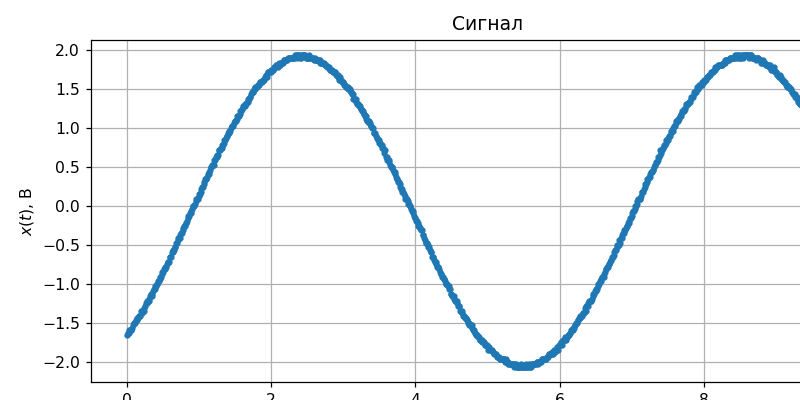

In [ ]:
plt.figure(figsize=[8, 4])
plt.plot(np.arange(signal_lev.size)/fs*1e3, signal_lev, '.-')
plt.title("Сигнал")
plt.xlabel("$t$, мc")
plt.ylabel("$x(t)$, В")
plt.grid()
plt.tight_layout()